In [ ]:
!pip install llama-index


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.7/808.7 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.1/253.1 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.3/302.3 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.2/129.2 kB 9.4 MB/s eta 0:00:00


In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: fineGrained).
The token `test` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `test`


In [ ]:
!pip install nltk sentence-transformers faiss-cpu transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 55.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
import glob
import pickle
import pandas as pd
import numpy as np
import faiss
import torch

from typing import List
from sklearn.model_selection import train_test_split
from sentence_transformers import SentenceTransformer

###############################################################################
# 0. Configuration
###############################################################################
# Update the pattern to match all your pickle files (here we assume they start with "batch")
PICKLE_PATTERN = "/content/batch*.pickle"       # Pattern to match all pickle files in /content/
CSV_FILE = "/content/annotations.csv"          # Path to your CSV file
OUTPUT_PARQUET = "/content/fine_tuning_data.parquet"
TEST_PROMPT_PARQUET = "/content/test_data.parquet"
TEST_EVAL_PARQUET = "/content/test_evaluation.parquet"
TEST_SIZE = 0.2  # No random seed provided now

# Example user query (for retrieving top contexts)
USER_QUERY = (
    "Your task is to identify the evidence regarding the following questions "
    "within the context of climate change adaptation:"
)

# System prompt to guide the model’s style or role (for all examples)
SYSTEM_PROMPT = (
    "You are a climate change research assistant with expertise in adaptation "
    "tracking through document analysis.\n"
    "Your task is to identify the evidence regarding the following questions "
    "within the context of climate change adaptation:"
)

# Embedding model (you can switch to a different one if needed)
EMBEDDING_MODEL = "sentence-transformers/all-MiniLM-L6-v2"

# Chunk size (in words)
CHUNK_SIZE = 300

# Number of contexts to retrieve per document
TOP_K = 5

###############################################################################
# 1. Load Documents from Multiple Pickle Files
###############################################################################
pickle_files = glob.glob(PICKLE_PATTERN)
print(f"Found {len(pickle_files)} pickle files.")

docs = []
for pickle_file in pickle_files:
    print(f"Processing {pickle_file} ...")
    with open(pickle_file, "rb") as f:
        data = pickle.load(f)  # Expecting each file to be a list of doc-like objects
    for doc in data:
        doc_text = doc.text_resource.text
        file_name = str(doc.metadata.get("file_name", ""))
        docs.append((file_name, doc_text))

df_docs = pd.DataFrame(docs, columns=["file_name", "doc_text"])
print(f"Total documents loaded: {len(df_docs)}")

###############################################################################
# 2. Train/Test Split (without setting a random seed)
###############################################################################
train_docs, test_docs = train_test_split(
    df_docs,
    test_size=TEST_SIZE
)

train_docs.reset_index(drop=True, inplace=True)
test_docs.reset_index(drop=True, inplace=True)

print(f"Training set: {len(train_docs)} docs")
print(f"Test set: {len(test_docs)} docs")

###############################################################################
# 3. Text Chunking Function
###############################################################################
def chunk_text(text: str, max_tokens: int = 300) -> List[str]:
    """
    Simple chunking by words.
    """
    words = text.split()
    chunks = []
    current_chunk = []
    for w in words:
        current_chunk.append(w)
        if len(current_chunk) >= max_tokens:
            chunks.append(" ".join(current_chunk))
            current_chunk = []
    if current_chunk:
        chunks.append(" ".join(current_chunk))
    return chunks

###############################################################################
# 4. Build a Simple RAG System with FAISS (for the entire corpus)
###############################################################################
embedder = SentenceTransformer(EMBEDDING_MODEL)

all_chunks = []
file_chunk_map = []  # Track which document each chunk belongs to

for idx, row in df_docs.iterrows():
    file_name = row["file_name"]
    text = row["doc_text"]
    text_chunks = chunk_text(text, max_tokens=CHUNK_SIZE)
    for chunk in text_chunks:
        all_chunks.append(chunk)
        file_chunk_map.append(file_name)

print(f"Total chunks created: {len(all_chunks)}")

print("Computing embeddings for all chunks...")
chunk_embeddings = embedder.encode(all_chunks, convert_to_numpy=True, show_progress_bar=True)

dim = chunk_embeddings.shape[1]
faiss_index = faiss.IndexFlatL2(dim)
faiss_index.add(chunk_embeddings)
print(f"FAISS index built with {faiss_index.ntotal} chunks.")

def retrieve_top_k_for_document(query: str, file_name: str, k: int = 3) -> List[str]:
    """
    For a given query and document (file_name), retrieve the top k context chunks only from that document.
    """
    indices = [i for i, fname in enumerate(file_chunk_map) if fname == file_name]
    if not indices:
        return []

    filtered_embeddings = chunk_embeddings[indices]
    filtered_chunks = [all_chunks[i] for i in indices]
    q_embed = embedder.encode([query], convert_to_numpy=True)
    distances = np.linalg.norm(filtered_embeddings - q_embed, axis=1)
    top_k_indices = np.argsort(distances)[:k]
    top_contexts = [filtered_chunks[i] for i in top_k_indices]
    return top_contexts


Found 11 pickle files.
Processing /content/batch4.pickle ...
Processing /content/batch6.pickle ...
Processing /content/batch2.pickle ...
Processing /content/batch11.pickle ...
Processing /content/batch8.pickle ...
Processing /content/batch10.pickle ...
Processing /content/batch3.pickle ...
Processing /content/batch5.pickle ...
Processing /content/batch9.pickle ...
Processing /content/batch1.pickle ...
Processing /content/batch7.pickle ...
Total documents loaded: 551
Training set: 440 docs
Test set: 111 docs


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Total chunks created: 13247
Computing embeddings for all chunks...


Batches:   0%|          | 0/414 [00:00<?, ?it/s]

FAISS index built with 13247 chunks.


In [ ]:
###############################################################################
# 5. Load CSV Annotations
###############################################################################
df_csv = pd.read_csv("/content/data.csv")
print(f"CSV rows loaded: {len(df_csv)}")

df_csv["Article.ID"] = df_csv["Article.ID"].astype(str).str.strip()
df_csv["Article.ID"] = df_csv["Article.ID"].apply(
    lambda x: x if x.endswith('.pdf') else f"{x}.pdf"
)

###############################################################################
# 6. Build Llama Prompt-Response Records for Training Data
###############################################################################
def build_llama_prompt(
    system_prompt: str,
    user_query: str,
    contexts: List[str],
    country: str,
    stakeholders: str,
    depth: str,
    explanation: str
) -> str:
    """
    Create a single record in the <s>[INST] ... [/INST] ... </s> format.
    """
    context_str = ""
    for i, ctx in enumerate(contexts, start=1):
        context_str += f"{i}) {ctx}\n"

    user_section = (
        f"Below are 5 relevant contexts from research papers:\n{context_str}\n"
        f"User question:\n"
        f"1. Where exactly in terms of geography is this adaptation response observed?\n"
        f"   If there are more than one location, please provide all that apply.\n"
        f"   Provide details in the format:\n"
        f"   Country name: <country name>,\n"
        f"   Sub-national region: <sub-national region>,\n\n"
        f"2. Please identify the adaptation response undertaken and, for the adaptation response identified,\n"
        f"   please list the stakeholders involved using the following categories:\n"
        f"   International or multinational governance institutions, Government (national), Government (sub-national),\n"
        f"   Government (local), Private sector (corporations), Private sector (SME), Civil society (international/multinational/national),\n"
        f"   Civil society (sub-national or local), Individuals or households, or Other.\n"
        f"   Respond in the format: Stakeholders: <your answer>\n\n"
        f"3. The depth of the climate adaptation response relates to the degree to which the change is new or transformative.\n"
        f"   Classify the depth as one of the following: Low; Medium; High; Not certain / Insufficient information / Not assessed.\n"
        f"   Respond in the format:\n"
        f"   Depth: <your assessment>,\n"
        f"   Explanation: <your reasoning for this assessment>.\n"
    )

    model_answer = (
        f"Country name: {country}\n"
        f"Stakeholders: {stakeholders}\n"
        f"Depth: {depth}\n"
        f"Explanation: {explanation}"
    )

    record = (
        f"<s>[INST] <<SYS>>\n{system_prompt}\n<</SYS>>\n\n"
        f"{user_section}\n[/INST]\n"
        f"{model_answer}\n</s>"
    )
    return record

records = []

# Process only the training set for prompt-response records
for idx, row in train_docs.iterrows():
    meta_file_name = str(row["file_name"])
    top_contexts = retrieve_top_k_for_document(USER_QUERY, meta_file_name, k=TOP_K)
    if not top_contexts:
        continue

    matching_rows = df_csv[df_csv["Article.ID"] == meta_file_name]
    if matching_rows.empty:
        print(f"No CSV match for file: {meta_file_name}")
        continue

    csv_file_name = matching_rows.iloc[0]["Article.ID"]
    print(f"Comparing Meta file: {meta_file_name} with CSV file: {csv_file_name}")

    match_row = matching_rows.iloc[0]
    country = match_row["1.1.1.Geography-Country"]
    stakeholders = match_row["2.1.1.Actors.Institutions"]
    depth = match_row["DEPTH SCORE"]
    explanation = match_row["4.4.1.Depth"]

    llama_record = build_llama_prompt(
        system_prompt=SYSTEM_PROMPT,
        user_query=USER_QUERY,
        contexts=top_contexts,
        country=country,
        stakeholders=stakeholders,
        depth=depth,
        explanation=explanation
    )
    records.append(llama_record)

df_final = pd.DataFrame(records, columns=["text"])
df_final.to_parquet(OUTPUT_PARQUET, index=False)
print(f"Saved fine-tuning dataset to {OUTPUT_PARQUET} with {len(df_final)} records.")


CSV rows loaded: 586
Comparing Meta file: 6714657.pdf with CSV file: 6714657.pdf
Comparing Meta file: 6714855.pdf with CSV file: 6714855.pdf
Comparing Meta file: 6715346.pdf with CSV file: 6715346.pdf
Comparing Meta file: 6714677.pdf with CSV file: 6714677.pdf
Comparing Meta file: 7851088.pdf with CSV file: 7851088.pdf
Comparing Meta file: 6714661.pdf with CSV file: 6714661.pdf
Comparing Meta file: 6714404.pdf with CSV file: 6714404.pdf
Comparing Meta file: 6714491.pdf with CSV file: 6714491.pdf
Comparing Meta file: 6714267.pdf with CSV file: 6714267.pdf
Comparing Meta file: 6714554.pdf with CSV file: 6714554.pdf
Comparing Meta file: 6714809.pdf with CSV file: 6714809.pdf
Comparing Meta file: 6714599.pdf with CSV file: 6714599.pdf
Comparing Meta file: 6714565.pdf with CSV file: 6714565.pdf
Comparing Meta file: 6714702.pdf with CSV file: 6714702.pdf
Comparing Meta file: 7851141.pdf with CSV file: 7851141.pdf
Comparing Meta file: 6714643.pdf with CSV file: 6714643.pdf
Comparing Meta file

In [ ]:

###############################################################################
# 7. Build Test Prompt-Only Records and Test Evaluation Records
###############################################################################
def build_test_prompt(
    system_prompt: str,
    user_query: str,
    contexts: List[str]
) -> str:
    """
    Create a test record in the <s>[INST] ... [/INST] ... </s> format without the model answer.
    """
    context_str = ""
    for i, ctx in enumerate(contexts, start=1):
        context_str += f"{i}) {ctx}\n"

    user_section = (
        f"Below are 5 relevant contexts from research papers:\n{context_str}\n"
        f"User question:\n"
        f"1. Where exactly in terms of geography is this adaptation response observed?\n"
        f"   If there are more than one location, please provide all that apply.\n"
        f"   Provide details in the format:\n"
        f"   Country name: <country name>,\n"
        f"   Sub-national region: <sub-national region>,\n\n"
        f"2. Please identify the adaptation response undertaken and, for the adaptation response identified,\n"
        f"   please list the stakeholders involved using the following categories:\n"
        f"   International or multinational governance institutions, Government (national), Government (sub-national),\n"
        f"   Government (local), Private sector (corporations), Private sector (SME), Civil society (international/multinational/national),\n"
        f"   Civil society (sub-national or local), Individuals or households, or Other.\n"
        f"   Respond in the format: Stakeholders: <your answer>\n\n"
        f"3. The depth of the climate adaptation response relates to the degree to which the change is new or transformative.\n"
        f"   Classify the depth as one of the following: Low; Medium; High; Not certain / Insufficient information / Not assessed.\n"
        f"   Respond in the format:\n"
        f"   Depth: <your assessment>,\n"
        f"   Explanation: <your reasoning for this assessment>.\n"
    )

    record = (
        f"<s>[INST] <<SYS>>\n{system_prompt}\n<</SYS>>\n\n"
        f"{user_section}\n[/INST]\n"
        f"</s>"
    )
    return record

test_prompt_records = []
test_eval_records = []  # To store ground truth evaluation data

# Process each document in the test set
for idx, row in test_docs.iterrows():
    meta_file_name = str(row["file_name"])
    top_contexts = retrieve_top_k_for_document(USER_QUERY, meta_file_name, k=TOP_K)
    if not top_contexts:
        continue

    # Build test prompt record (without model answer)
    llama_test_record = build_test_prompt(
        system_prompt=SYSTEM_PROMPT,
        user_query=USER_QUERY,
        contexts=top_contexts
    )
    test_prompt_records.append(llama_test_record)

    # Also build the corresponding test evaluation record using CSV annotations
    matching_rows = df_csv[df_csv["Article.ID"] == meta_file_name]
    if matching_rows.empty:
        print(f"No CSV match for test file: {meta_file_name}")
        continue

    match_row = matching_rows.iloc[0]
    eval_record = {
        "file_name": meta_file_name,
        "country": match_row["1.1.1.Geography-Country"],
        "stakeholders": match_row["2.1.1.Actors.Institutions"],
        "depth": match_row["DEPTH SCORE"],
        "explanation": match_row["4.4.1.Depth"]
    }
    test_eval_records.append(eval_record)

df_test_prompts = pd.DataFrame(test_prompt_records, columns=["text"])
df_test_prompts.to_parquet(TEST_PROMPT_PARQUET, index=False)
print(f"Saved test prompt dataset to {TEST_PROMPT_PARQUET} with {len(df_test_prompts)} records.")

df_test_eval = pd.DataFrame(test_eval_records)
df_test_eval.to_parquet(TEST_EVAL_PARQUET, index=False)
print(f"Saved test evaluation dataset to {TEST_EVAL_PARQUET} with {len(df_test_eval)} records.")

Saved test prompt dataset to /content/test_data.parquet with 111 records.
Saved test evaluation dataset to /content/test_evaluation.parquet with 111 records.


In [ ]:
import pandas as pd

df = pd.read_parquet('/content/dummy_dataset.parquet')
for idx, row in df.iterrows():
    print(f"Record {idx+1}:\n")
    print(row['text'])
    print("\n" + "="*80 + "\n")


Record 1:



KeyError: 'text'

In [ ]:
import pandas as pd

df = pd.read_parquet('/content/test_evaluation.parquet')
for idx, row in df.iterrows():
    print(f"Record {idx+1}:\n")
    print(f"File Name: {row['file_name']}")
    print(f"Country: {row['country']}")
    print(f"Stakeholders: {row['stakeholders']}")
    print(f"Depth: {row['depth']}")
    print(f"Explanation: {row['explanation']}")
    print("\n" + "="*80 + "\n")


Record 1:

File Name: 6714370.pdf
Country: Australia|||Corangamite Shire, Victoria
Stakeholders:  Individuals or households
Depth: Low
Explanation: Very detailed in responses here, good study for the depth of change reported|||Good multi-layered analysis here, too|||There is a depth of change but farmers were responding more to economic conditions, rather than climatic conditions.


Record 2:

File Name: 6714261.pdf
Country: Pakistan
Stakeholders:  Individuals or households||| National government
Depth: Low
Explanation: Medium|||A change that has limited depth.


Record 3:

File Name: 6714294.pdf
Country: Ghana
Stakeholders:  Individuals or households||| Local government||| Civil Society- sub-national or local
Depth: Low
Explanation: Limited depth|||Shallow depth, farmer-led responses, need institutional involvement for transformational changes.|||Limited depth|||In depth


Record 4:

File Name: 6714375.pdf
Country: Bangladesh|||Rajshahi district
Stakeholders:  Individuals or household

In [ ]:
import pandas as pd
import re

def extract_conversation(text):
    """
    Extracts the system, human, and gpt parts from the conversation text.
    Assumes the text is in the following format:

    <s>[INST] <<SYS>>
    System Prompt
    <</SYS>>

    User Prompt [/INST] Model answer </s>
    """
    # Extract system part: text between <<SYS>> and <</SYS>>
    system_match = re.search(r'<<SYS>>(.*?)<</SYS>>', text, re.DOTALL)
    system_text = system_match.group(1).strip() if system_match else ""

    # Extract human part: text after <</SYS>> and before [/INST]
    human_match = re.search(r'<</SYS>>\s*(.*?)\s*\[/INST\]', text, re.DOTALL)
    human_text = human_match.group(1).strip() if human_match else ""

    # Extract gpt part: text between [/INST] and </s>
    gpt_match = re.search(r'\[/INST\](.*?)</s>', text, re.DOTALL)
    gpt_text = gpt_match.group(1).strip() if gpt_match else ""

    # Build the list of dictionaries in the target format
    conversation = [
        {"from":"system","value": system_text},
        {"from":"human","value": human_text},
        {"from":"gpt","value": gpt_text} #comment for test data
    ]
    return conversation

# Replace with your actual input Parquet file path
input_file = "/content/fine_tuning_data.parquet"
output_file = "/content/converted_dataset.parquet"

# Read the original dataset. We assume the conversation text is in a column named "text".
df = pd.read_parquet(input_file)

# Process each row, extracting the conversation parts.
conversations = []
for idx, row in df.iterrows():
    conversation_text = row['text']  # adjust column name if necessary
    conv = extract_conversation(conversation_text)
    conversations.append(conv)

# Save the resulting list of conversations into a new DataFrame.
# Here, each row is one conversation (stored in the "conversation" column as a list).
df_out = pd.DataFrame({"conversation": conversations})

# Write the output DataFrame to a new Parquet file.
df_out.to_parquet(output_file, index=False)

print(f"Conversion complete. The output is saved in {output_file}")


Conversion complete. The output is saved in /content/converted_dataset.parquet


In [ ]:
import pandas as pd

# Read your Parquet file (adjust the file path as needed)
df = pd.read_parquet("/content/converted_test_dataset.parquet")

# Set pandas display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Print the entire DataFrame
print(df)


In [ ]:
import pandas as pd

df = pd.read_parquet('/content/test_data.parquet')
for idx, row in df.iterrows():
    print(f"Record {idx+1}:\n")
    print(row['text'])
    print("\n" + "="*80 + "\n")


Record 1:

<s>[INST] <<SYS>>
You are a climate change research assistant with expertise in adaptation tracking through document analysis.
Your task is to identify the evidence regarding the following questions within the context of climate change adaptation:
<</SYS>>

Below are 3 relevant contexts from research papers:
1) typical semi-arid area and the rain-fed agricultural production mode determines that rainfall is a main factor restricting local agricultural development. The warming and drying trend and extreme weather pose a significant threat to dry land agricultural production. Farmers, as the subject of agricultural production, are facing severe challenges. Governments and academia are increasingly concerned There is growing concern about reducing agricultural losses and improving farmers' ability to adapt to climate change. A vast body of literature exists to explore the impact of climate change on farmers' livelihood (Shisanya and Mafongoya, 2016; Yazdanpanah et al., 2015; Has

In [ ]:
import pandas as pd

# Load the test dataset from the parquet file
df = pd.read_parquet('/content/test_evaluation.parquet')
print("Columns in the DataFrame:", df.columns.tolist())

Columns in the DataFrame: ['file_name', 'country', 'stakeholders', 'depth', 'explanation']


In [ ]:
import pandas as pd

# Load the test dataset from the parquet file
df = pd.read_parquet('/content/converted_test_dataset.parquet')
print("Columns in the DataFrame:", df.columns.tolist())

def convert_record(record):
    """
    Convert a record (a list of dictionaries) from keys "from" and "value"
    to keys "role" and "content". Replace "human" with "user" for role.
    """
    converted = []
    for msg in record:
        role = msg.get("from")
        # Replace 'human' with 'user'
        if role == "human":
            role = "user"
        converted.append({
            "role": role,
            "content": msg.get("value")
        })
    return converted

# Apply the conversion on the 'conversation' column
df["converted"] = df["conversation"].apply(convert_record)

# Rename the converted column to "messages" for consistency
df_converted = df[["converted"]].rename(columns={"converted": "messages"})

# Save the converted dataset to a new parquet file
df_converted.to_parquet('/content/test_data_converted_for_llama_3.2.parquet', index=False)
print("Converted dataset saved to /content/test_data_converted_for_llama_3.parquet")

# Optionally, print the converted records
for idx, row in df_converted.iterrows():
    print(f"Record {idx+1}:")
    print(row["messages"])
    print("\n" + "="*80 + "\n")


Columns in the DataFrame: ['conversation']
Converted dataset saved to /content/test_data_converted_for_llama_3.parquet
Record 1:
[{'role': 'system', 'content': 'You are a climate change research assistant with expertise in adaptation tracking through document analysis.\nYour task is to identify the evidence regarding the following questions within the context of climate change adaptation:'}, {'role': 'user', 'content': 'Below are 5 relevant contexts from research papers:\n1) Lower yields, or failure to increase yields via adoption in the short-to-medium term, can ensue from a variety of factors (Rusinamhodzi et al., 2011; Brouder and Gomez-Macpherson, 2014; Stevenson et al., 2014). In a recent meta-analysis of 610 studies in See NEPAD (2014), http://www.nepad.org/programme/climate-smart-agriculture (accessed 10.09.2016), and Alliance for Climate Smart Agriculture in Africa (2016), http://csa.octoplus.co.za/ (accessed 13.09.2016). # Conservation agriculture, ‘climate smart’ agriculture,

In [ ]:
%%capture
!pip install unsloth
# Also get the latest nightly Unsloth!
!pip uninstall unsloth -y && pip install --upgrade --no-cache-dir --no-deps git+https://github.com/unslothai/unsloth.git@nightly git+https://github.com/unslothai/unsloth-zoo.git

In [ ]:
!pip install -U bitsandbytes

In [ ]:
from unsloth import FastLanguageModel
import torch
max_seq_length = 2048 # Choose any! We auto support RoPE Scaling internally!
dtype = None # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = True # Use 4bit quantization to reduce memory usage. Can be False.

# 4bit pre quantized models we support for 4x faster downloading + no OOMs.
fourbit_models = [
    "unsloth/Meta-Llama-3.1-8B-bnb-4bit",      # Llama-3.1 2x faster
    "unsloth/Meta-Llama-3.1-8B-Instruct-bnb-4bit",
    "unsloth/Meta-Llama-3.1-70B-bnb-4bit",
    "unsloth/Meta-Llama-3.1-405B-bnb-4bit",    # 4bit for 405b!
    "unsloth/Mistral-Small-Instruct-2409",     # Mistral 22b 2x faster!
    "unsloth/mistral-7b-instruct-v0.3-bnb-4bit",
    "unsloth/Phi-3.5-mini-instruct",           # Phi-3.5 2x faster!
    "unsloth/Phi-3-medium-4k-instruct",
    "unsloth/gemma-2-9b-bnb-4bit",
    "unsloth/gemma-2-27b-bnb-4bit",            # Gemma 2x faster!

    "unsloth/Llama-3.2-1B-bnb-4bit",           # NEW! Llama 3.2 models
    "unsloth/Llama-3.2-1B-Instruct-bnb-4bit",
    "unsloth/Llama-3.2-3B-bnb-4bit",
    "unsloth/Llama-3.2-3B-Instruct-bnb-4bit",

    "unsloth/Llama-3.3-70B-Instruct-bnb-4bit" # NEW! Llama 3.3 70B!
] # More models at https://huggingface.co/unsloth

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Llama-3.2-3B-Instruct", # or choose "unsloth/Llama-3.2-1B-Instruct"
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
    # token = "hf_...", # use one if using gated models like meta-llama/Llama-2-7b-hf
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.50.0.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/2.35G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/54.7k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/454 [00:00<?, ?B/s]

In [ ]:
messages = [{'role': 'system', 'content': 'You are a climate change research assistant with expertise in adaptation tracking through document analysis.\nYour task is to identify the evidence regarding the following questions within the context of climate change adaptation:'}, {'role': 'user', 'content': "Below are 3 relevant contexts from research papers:\n1) the respondents, i.e. 83%, were experiencing climate changes in the Himalayan region. About 93% of the interviewees were experiencing a change in the temperature, 68% were experiencing a change in the winds, and 72% were experiencing changes in rainfall. To combat the climate challenge, the farmers adopted a number of coping strategies like drought-resistant varieties, participation in non-farm activities, adjustment in the sowing time, planting trees and crop-livestock interaction. These strategies were included in the questionnaires based on the pilot studies. --- # Table 2 Data and description of variables. Source: Authors’ calculations. |Variable|Description|Mean|Std. Dev| |---|---|---|---| |Dependent variables| | | | |Drought-resistant varieties|1 if the household has planted drought-resistant varieties, 0 otherwise|0.31|0.24| |Non-farm participation|1 if the household participated in non-farm activities, 0 otherwise|0.38|0.29| |Sowing time adjustment|1 if the household has adjusted sowing time, 0 otherwise|0.27|0.21| |Tree plantation|1 if the household has planted trees, 0 otherwise|0.45|0.34| |Crop-livestock interaction|1 if the household have both crops and livestock, 0 otherwise|0.69|0.37| |Independent variable| | | | |Demographic| | | | |Farmer's age|Age of the farmers in years|52.09|13.05| |Head age|Age of the household head in years|56|13.67| |Adult males|Number of adult males in the household|4.12|0.26| |Adult females|Number of adult females in the household|4.05|0.34| |Human capital| | | | |Farmers education|Education of the farmer in years|6.07|5.75| |Head education|Education of the head in years|5.8|5.8| |Land assets| | | | |Farmer status|1 if the farmer is owner, 0 otherwise|0.82|0.51| |Own land holdings|Land owned by the farmers in number of Kanals|29.88|24.69| |Household and agricultural assets| | | | |Television|1 if the household owns a TV, 0 otherwise|0.41|0.33| |Refrigerator|1 if the household owns a refrigerator, 0 otherwise|0.36|0.24| |Tractor|1 if the household owns a tractor, 0 otherwise|0.06|0.17| |Trolley|1 if the household owns a trolley, 0 otherwise|0.10|0.32| |Kasola|1 if the household owns a kasola, 0 otherwise|0.83|0.27| |Social capital| | | | |Membership|1 if\n2) the model estimated. # 4. Conclusion Using comprehensive primary data collected from 500 farm households in the seven districts of the Gilgit-Baltistan province in the Himalayan region of Pakistan, this paper adds many novel contributions to the research on climate-change risk-coping strategies. First, the quality are presented in Table 6. The median absolute bias is quite high before matching and is quite low after matching; the bias before is in the range of 18–25 and, after matching, the bias is in the range of 4–6, indicating a percentage bias reduction in the range of 68–83%. Such a high percentage bias reduction shows that, after matching, the group adopting climate risk management strategies and the group not adopting them is very similar to each other. The value of R-square, used as another measure to check the matching quality, is high before matching and is much lower after matching. The value of R-square indicates that, after matching, both groups are very similar to each other. Fig. 2 clearly indicates that the matching quality is excellent. The result from Table 7 and Fig. 2 on the matching quality shows that after matching the group adopting climate risk management strategies and the group not adopting them are very similar to each other. All the matching estimators compare the outcome of the treated and non-treated (comparison) groups. Hence, the similarity between the treated and non-treated groups indicates good matching quality and the impact result obtained in Table 4 are reliable. The matching results are in line with previous studies [2,6]. --- |Risk management strategy|Outcome|Median absolute bias before matching|Median absolute bias after matching|Percentage bias reduction|Value of R-square before matching|Value of R-square after matching|Joint significance of covariates before matching|Joint significance of covariates after matching| |---|---|---|---|---|---|---|---|---| |Sowing time adjustment|Income|24.35|4.06|83|0.257|0.002|0.001|0.294| | |Wheat Yield|20.91|5.47|73|0.334|0.001|0.003|0.236| | |Poverty|23.69|5.11|78|0.336|0.003|0.002|0.275| |Resistant varieties|Income|19.37|4.28|77|0.275|0.002|0.001|0.386| | |Wheat\n3) wellbeing.| 1. Introduction Climate change is pervasive in nature, posing huge threats to sustainable development and poverty reduction [34,38,42]. Detrimental effects of climate changes are manifesting throughout the world as floods, drought, dry seasons, tornados, erratic rainfall, rising temperature, receding glaciers, etc. The world is experiencing 400–500 abnormal disasters each year now, compared to only 125 yearly in the 1980s [26]. Socio-economic conditions and geographical location of most of the developing countries makes them more vulnerable to the effects of climate change; their capabilities to adapt to the changes and limited resources will worsen the situation [27]. Climate change has adversely affected the developmental efforts of the government and international communities [42]. Agricultural productivity has been declining over the years due to climatic variabilities. Though the effect of climate change differs across season and by crop, a negative relation between climate change and crop yields is found in South Asia. Hence Corresponding author: E-mail address: akhter.ali@cgiar.org (A. Ali). http://dx.doi.org/10.1016/j.ijdrr.2017.05.006 Received 3 October 2016; Received in revised form 5 April 2017; Accepted 14 May 2017 Available online 28 May 2017 2212-4209/ © 2017 Elsevier Ltd. All rights reserved. --- # D.B. Rahut, A. Ali International Journal of Disaster Risk Reduction 24 (2017) 515–525 Table making it troublesome for individuals to take meaningful measures for their safety, crops, and animals [36]. Establishment of adaptive capacity, knowledge, and governance and the adaptation itself are crucial for effective human adaptation to climate change [30]. However, climate-change induced risks at the rate and scale projected in the greater Himalayas cannot be obliterated by a natural process of gradual adaptation. People must struggle to reduce future negative consequences. By using traditional ecological knowledge and customs, inhabitants in the hilly areas can cope with natural hazards [10]. Moreover, adaptations of mitigation strategies such as conservation agriculture, cover\n\nUser question:\n1. Where exactly in terms of geography is this adaptation response observed?\n   If there are more than one location, please provide all that apply.\n   Provide details in the format:\n   Country name: <country name>,\n   Sub-national region: <sub-national region>,\n\n2. Please identify the adaptation response undertaken and, for the adaptation response identified,\n   please list the stakeholders involved using the following categories:\n   International or multinational governance institutions, Government (national), Government (sub-national),\n   Government (local), Private sector (corporations), Private sector (SME), Civil society (international/multinational/national),\n   Civil society (sub-national or local), Individuals or households, or Other.\n   Respond in the format: Stakeholders: <your answer>\n\n3. The depth of the climate adaptation response relates to the degree to which the change is new or transformative.\n   Classify the depth as one of the following: Low; Medium; High; Not certain / Insufficient information / Not assessed.\n   Respond in the format:\n   Depth: <your assessment>,\n   Explanation: <your reasoning for this assessment>."}]


In [ ]:
FastLanguageModel.for_inference(model) # Enable native 2x faster inference


inputs = tokenizer.apply_chat_template(
    messages,
    tokenize = True,
    add_generation_prompt = True, # Must add for generation
    return_tensors = "pt",
).to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(input_ids = inputs, streamer = text_streamer, max_new_tokens = 128,
                   use_cache = True, temperature = 1.5, min_p = 0.1)

Based on the provided contexts from research papers, I will attempt to answer the questions and identify the evidence regarding the evidence regarding climate change adaptation:

1. Where exactly in terms of geography is this adaptation response observed?
   Countries: Pakistan, Province: Gilgit-Baltistan.
   Sub-national region: Seven districts.

2. Please identify the adaptation response undertaken and, for the adaptation response identified, please list the stakeholders involved using the following categories:
   Adaptation response: Coping strategies for climate change (sowing time adjustment, planting trees, drought-resistant varieties, non-farm activities, crop-livestock interaction).
   Stakeholders


In [ ]:
import pandas as pd
from transformers import TextStreamer

# Load test dataset (assuming it has a "messages" column in the desired format)
test_df = pd.read_parquet('/content/test_data_converted_for_llama_3.2.parquet')

# List to store model outputs for each test record
results = []

# Enable native 2x faster inference
FastLanguageModel.for_inference(model)

# Loop through each record
for idx, row in test_df.iterrows():
    messages = row["messages"]  # Each record is a list of dicts in the required format

    # Prepare inputs using your tokenizer apply_chat_template function
    inputs = tokenizer.apply_chat_template(
        messages,
        tokenize=True,
        add_generation_prompt=True,  # Must add for generation
        return_tensors="pt",
    ).to("cuda")

    # Create a TextStreamer to print the output as it is generated (optional)
    text_streamer = TextStreamer(tokenizer, skip_prompt=True)

    # Generate output using the fine-tuned model
    generated_ids = model.generate(
        input_ids=inputs,
        streamer=text_streamer,
        max_new_tokens=128,
        use_cache=True,
        temperature=1.5,
        min_p=0.1
    )

    # Decode the generated tokens
    output_text = tokenizer.decode(generated_ids[0], skip_special_tokens=True)
    results.append(output_text)
    print(f"Processed record {idx+1}")

# Save the results to a parquet file
results_df = pd.DataFrame({"result": results})
results_df.to_parquet("/content/test_results.parquet", index=False)
print(f"Saved generated test results to /content/test_results.parquet with {len(results_df)} records.")


Based on the provided research contexts, I can help answer the questions.

**Question 1: Where exactly in terms of geography is this adaptation response observed?**

The research contexts do not explicitly mention the geography or location where the adaptation response is observed. However, based on the information provided, we can make some inferences. The study on farmers' perception and adaptation to climate change (Shisanya and Mafongoya, 2016; Yazdanpanah et al., 2015; Hasan and Kumar, 2019; etc.) likely focuses on semi-arid areas with limited agricultural land and resources, possibly in tropical
Processed record 1
Based on the provided text, here are the answers to the questions:

1. Geography: 

Pakistan, specifically the seven districts of the Gilgit-Baltistan province in the Himalayan region.

2. Adaptation response:
Stakeholders: International or multinational governance institutions - CGIAR,
Government (national) - Government of Pakistan,
Government (sub-national) - Governme

Unsloth: Input IDs of length 2312 > the model's max sequence length of 2048.
We shall truncate it ourselves. It's imperative if you correct this issue first.


|-|-|-|-|-|-|-| |.Table 3: |Variables| Belief| Risk Perception| Risk Salience| Trust | Geographic Distance | Temporal Distance | Social Distance | Hypotheticality | |---|---|---|---|---|---|---|---|---| |Adaptation Behavior | 0.212 | | | 0.124 | | | - | | 0.180 | | | 0.180 | | 0.335 | | | 0.124 | | | | 0.162 | | - | | 0.180 |
Processed record 11
I'll address each of the user's questions based on the provided contexts.

1. **Geographic location**: Where exactly is this adaptation response observed?

The study area is located in the Union of Shyamnagar upazila (sub-district) in the Satkhira district, Bangladesh. It can be considered a coastal wetland in the southwest coast of Bangladesh. No other locations are mentioned in the context.

2. **Stakeholders involved**: List the stakeholders involved in the adaptation response identified.

- International or multinational governance institutions: None mentioned
- Government (national): None mentioned
- Government (sub-national): The
Processe

Unsloth: Input IDs of length 2219 > the model's max sequence length of 2048.
We shall truncate it ourselves. It's imperative if you correct this issue first.


 and and

Country name: Benin
 Sub-national region: Alphonse II Region 

Country name: Burkina Faso
 Sub-national region: Cascade

Country name: Cape Verde 
 Sub-national region: 
 

Country name: Côte d'Ivoire
 Sub-national region: 
 

Country name: Gambia 
 Sub-national region: 
 

Country name: Ghana
 Sub-national region: 
 

Country name: Guinea
 Sub-national region: 
 

Country name: Guinea Bissau 
 Sub-national region: 
 

Country name: Ivory Coast
 Sub-national region: 
 

Country name: Liberia 
 Sub
Processed record 15
Based on the provided context, here are the answers to the questions:

1. Where exactly in terms of geography is this adaptation response observed?

Country: Kenya
Sub-national region: Turkwel River periurban areas, also near the city of Nairobi.

2. Please identify the adaptation response undertaken and, for the adaptation response identified, list the stakeholders involved:

Adaptation response: Livelihood diversification
Stakeholders:
International or multinat

Unsloth: Input IDs of length 2238 > the model's max sequence length of 2048.
We shall truncate it ourselves. It's imperative if you correct this issue first.


Processed record 21
>, or< <
2. Are the adaptations described here also relevant to the broader environmental or climate change contexts in West Africa as a whole?
   Please provide examples if applicable.

Note: Given the details above and the type of research question you've specified, I will attempt to address the questions based on the information given. 

1. To answer your first research question about where exactly in terms of geography the adaptation response is observed, please refer to the various research papers and findings as follows:
   Ghana: The study by Tachie-Obeng et al. (2012) focused on considering effective adaptation options to impacts of climate change


Unsloth: Input IDs of length 2207 > the model's max sequence length of 2048.
We shall truncate it ourselves. It's imperative if you correct this issue first.


Processed record 22
 the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the
Processed record 23
Based on the provided contexts, I will answer the user question:

1. Where exactly in terms of geography is this adaptation response observed?

Country name: Ghana,
 Sub-national region: Northern Ghana.

2. Please identify the adaptation response undertaken and, for the adaptation response identified, please list the stakeholders involved using the following categories:

Adaptation response: Enhancing resilience to climate shocks through farme

Unsloth: Input IDs of length 2067 > the model's max sequence length of 2048.
We shall truncate it ourselves. It's imperative if you correct this issue first.


Processed record 30
 <your answer>><|eot_id|>
Processed record 31
Based on the provided contexts:

1. Geography:
   Tanzania: Eastern Tanzania, specifically the Uluguru Mountains, and the village of Kolero.

2. Adaptation Response:
   Stakeholders:
   * International or multinational governance institutions: CCAFS (Climate Change Agriculture and Food Security)
   * Government (national): No specific mention
   * Government (sub-national): CARE Tanzania; UN FAO (Tanzania), International Centre for Rural Development and others mentioned.
   * Private sector (corporations): CARE and ICRAF
   * Civil society (international/multinational/national): CCAFS;
Processed record 32
Context 1:

1. Geography:
Kenya, Western region of the country.

2. Adaptation Response:
Conservation agriculture.

Stakeholders:

* International or multinational governance institutions: Chronic Poverty Research Centre (CPRC), German Development Institute
* Government (national): Ministry of Agriculture and Food Devel

Unsloth: Input IDs of length 2124 > the model's max sequence length of 2048.
We shall truncate it ourselves. It's imperative if you correct this issue first.


Processed record 33
. 

Context 1: Maharjan & Maharjan, S. and K. (2018)
Roles and contributions of community seed banks in climate adaptation in Nepal

Location: Nepal
Stakeholders: Government (national), Civil society (international/national), Private sector (corporations), Individuals or households
Adaptation Response Undertaken: Development of community seed banks

Context 2: McSweeney, C., M. and G. (2008)
UNDP climate change country profiles: Vietnam

Location: Viet Nam
Stakeholders: Government (national), Civil society (national), International or multinational governance institutions
Processed record 34
Based on the provided texts, I can answer the following questions:

1. Where exactly in terms of geography is this adaptation response observed?

Country names:
- Ethiopia
- Pakistan
- Ghana
- Bangladesh
- Burkina Faso
Sub-national regions:
- Punjab province, Pakistan
- Ghana (no specific sub-national region mentioned)

Stakeholders:
- International or multinational governance i

Unsloth: Input IDs of length 2198 > the model's max sequence length of 2048.
We shall truncate it ourselves. It's imperative if you correct this issue first.


Processed record 57
 •

3. Please provide an example of an adaptation response that is undertaken by the farmers, in particular for the location
   that was specified in question 1. In the case of multiple locations, provide one example per location.



Here is my answer:

1. Country name:
   Sub-national region:
   Specific Location:
   Ethiopia,
   Central Rift Valley (specifically),
   Ethiopia Central Rift Valley,

2. Adaptation response undertaken:
   Answer: Increased crop variability (yield, disease, pest, and quality loss)
   
   Stakeholders involved:
   -Farmers
   -Agricultural officials (specifically farmers
Processed record 58
Here are the answers to the three questions:

1. Where exactly in terms of geography is this adaptation response observed?

Country: China,
Sub-national region: Northern province of Ningxia (NX region).

2. Please identify the adaptation response undertaken and, for the adaptation response identified, please list the stakeholders involved:

Stakehold

Unsloth: Input IDs of length 2194 > the model's max sequence length of 2048.
We shall truncate it ourselves. It's imperative if you correct this issue first.


 structures or systems: None of these,

   Specific agricultural sector(s): agriculture,
   Specific type of agriculture or agricultural practices: None,
   Specific animal(s): None,
   Specific water source or use: irrigation,
   Community or local group: None.

3. What were the main effects on these adaptations?

The final two questions are:
4. How did the study assess the effects of this adaptation?
The final question is:
5. What were the main limitations of this study?

Please provide the answer to the question in the specified format for 1 & 4 and 3, and the requested format for 2.<|eot_id|>
Processed record 71
Here are the answers to the provided questions based on the context:

1. Geography:
   Africa (specifically East Africa): Country: Kenya (East Africa sub-region)
   Asia (specifically India): Country: India (varies across sub-national region)

2. Adaptation response:
   Stakeholders:
   International or multinational governance institutions: None
   Government (national): N

Unsloth: Input IDs of length 2556 > the model's max sequence length of 2048.
We shall truncate it ourselves. It's imperative if you correct this issue first.


doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi doi
Processed record 79
I'll provide the information requested based on the given contexts.

**1. Where exactly in terms of geography is this adaptation response observed?**

Country: India,
Sub-national region: Semi-arid tropical regions of South Asia (e.g., Andhra Pradesh), Sub-national region: Sub-Saharan Africa (e.g., Ethiopia) (Note: Bezabih and Di Falco, 2012), Country: Ethiopia,

**2. Please identify the adaptation response undertaken and, for the adaptation response identified, p

Unsloth: Input IDs of length 2100 > the model's max sequence length of 2048.
We shall truncate it ourselves. It's imperative if you correct this issue first.


 the transformative depth of the response:

   Transformational (where there is a significant shift in the underlying dynamics, processes or outcomes),
   Incremental (where the change builds on the previous context but represents only a modification of the existing dynamics, processes or outcomes),

   or: Non-transformative (where the adaptation response builds on an existing mechanism of the system), 

   Select appropriate label to represent the depth of the adaptation response

4. What are the outcomes of the adaptation response on economic factors? 
   Select the relevant outcomes from the list provided.

   1. Decreased labor cost of production
   2. Increased labor
Processed record 110
I'll answer your questions based on the provided contexts.

**Question 1: Geography**

1. Country: Burkina Faso,
Sub-national region: Savanna region.

2. Country: Niger,
Sub-national region: Nigerien Sahara.

These regions are mentioned in the context of the FAO (2009) report on the decline of ra

In [ ]:
import pandas as pd
import re
from sklearn.metrics import accuracy_score

# Load evaluation (ground truth) and test result data
eval_df = pd.read_parquet("/content/test_evaluation.parquet")
test_df = pd.read_parquet("/content/test_results_context_8.parquet")

# Debug: Print column names to confirm the structure
print("Evaluation DataFrame columns:", eval_df.columns)
print("Test Results DataFrame columns:", test_df.columns)

# Ensure both DataFrames have the same number of records
assert len(eval_df) == len(test_df), "Mismatch in number of records!"

# Merge based on index since no explicit ID column
df = pd.concat([eval_df.reset_index(drop=True), test_df.reset_index(drop=True)], axis=1)

# Define a function to extract values using regular expression
def extract_info(text, field_name):
    # Create the pattern based on field name, capturing the value
    pattern = rf'{field_name}: (.+?)(?=\n|$)'
    match = re.search(pattern, text)
    return match.group(1).strip() if match else None

# Apply extraction for each required field
df['country_pred'] = df['result'].apply(lambda x: extract_info(x, 'Country name'))
df['stakeholders_pred'] = df['result'].apply(lambda x: extract_info(x, 'Stakeholders'))
df['depth_pred'] = df['result'].apply(lambda x: extract_info(x, 'Depth'))

# Normalize the text fields by lowercasing and trimming whitespace
def normalize_text(text):
    if isinstance(text, str):
        return text.lower().strip()
    return 'unknown'  # Handle None by replacing with 'unknown'

# Apply normalization to the extracted fields
for col in ['country_pred', 'stakeholders_pred', 'depth_pred']:
    df[col] = df[col].apply(normalize_text)

# Normalize the evaluation columns
df['country_true'] = df['country'].apply(normalize_text)
df['stakeholders_true'] = df['stakeholders'].apply(normalize_text)
df['depth_true'] = df['depth'].apply(normalize_text)

# Handle cases where the true values contain multiple countries
def multi_value_match(pred, true):
    pred_set = set(pred.split('|||'))
    true_set = set(true.split('|||'))
    return not pred_set.isdisjoint(true_set)

# Compute accuracy for each field, handling any potential None values
country_accuracy = df.apply(lambda row: multi_value_match(row['country_pred'], row['country_true']), axis=1).mean()
stakeholders_accuracy = df.apply(lambda row: multi_value_match(row['stakeholders_pred'], row['stakeholders_true']), axis=1).mean()
depth_accuracy = df.apply(lambda row: multi_value_match(row['depth_pred'], row['depth_true']), axis=1).mean()

# Print the results
print(f"Country Accuracy: {country_accuracy:.2f}")
print(f"Stakeholders Accuracy: {stakeholders_accuracy:.2f}")
print(f"Depth Accuracy: {depth_accuracy:.2f}")


Evaluation DataFrame columns: Index(['file_name', 'country', 'stakeholders', 'depth', 'explanation'], dtype='object')
Test Results DataFrame columns: Index(['result'], dtype='object')
Country Accuracy: 0.86
Stakeholders Accuracy: 0.79
Depth Accuracy: 0.66


In [ ]:
import pandas as pd
import re
import glob
import os
from tabulate import tabulate  # For nice table printing

# Load evaluation (ground truth) data
eval_df = pd.read_parquet("/content/test_evaluation.parquet")

# Get a list of all test results files matching the pattern
result_files = glob.glob("/content/test_results_temperature_*.parquet")

# Define helper functions
def extract_info(text, field_name):
    """
    Extracts the value following a field name from text.
    For example, from "Country name: USA\n..." it returns "USA".
    """
    pattern = rf'{field_name}: (.+?)(?=\n|$)'
    match = re.search(pattern, text)
    return match.group(1).strip() if match else None

def normalize_text(text):
    """
    Lowercases and trims whitespace.
    If text is not a string, returns 'unknown'.
    """
    if isinstance(text, str):
        return text.lower().strip()
    return 'unknown'

def multi_value_match(pred, true):
    """
    Splits the string by '|||' and returns True if there is any overlap.
    """
    pred_set = set(pred.split('|||'))
    true_set = set(true.split('|||'))
    return not pred_set.isdisjoint(true_set)

# List to store accuracy metrics for each temperature value
accuracy_list = []

# Loop through each test result file
for file in result_files:
    # Extract temperature value from the file name
    basename = os.path.basename(file)
    # Example file name: test_results_temperature_0.1.parquet
    temp_str = basename.split('_')[-1].replace('.parquet', '')
    temperature = float(temp_str)

    # Load test results DataFrame
    test_df = pd.read_parquet(file)

    # Ensure both DataFrames have the same number of records and merge them by index
    assert len(eval_df) == len(test_df), "Mismatch in number of records!"
    df = pd.concat([eval_df.reset_index(drop=True), test_df.reset_index(drop=True)], axis=1)

    # Extract predicted fields from the "result" column using regex
    df['country_pred'] = df['result'].apply(lambda x: extract_info(x, 'Country name'))
    df['stakeholders_pred'] = df['result'].apply(lambda x: extract_info(x, 'Stakeholders'))
    df['depth_pred'] = df['result'].apply(lambda x: extract_info(x, 'Depth'))

    # Normalize both predicted fields and evaluation (ground truth) fields
    for col in ['country_pred', 'stakeholders_pred', 'depth_pred']:
        df[col] = df[col].apply(normalize_text)

    df['country_true'] = df['country'].apply(normalize_text)
    df['stakeholders_true'] = df['stakeholders'].apply(normalize_text)
    df['depth_true'] = df['depth'].apply(normalize_text)

    # Compute accuracy for each field using the multi_value_match function
    country_accuracy = df.apply(lambda row: multi_value_match(row['country_pred'], row['country_true']), axis=1).mean()
    stakeholders_accuracy = df.apply(lambda row: multi_value_match(row['stakeholders_pred'], row['stakeholders_true']), axis=1).mean()
    depth_accuracy = df.apply(lambda row: multi_value_match(row['depth_pred'], row['depth_true']), axis=1).mean()

    # Append the results to the list
    accuracy_list.append({
        "Temperature": temperature,
        "Country Accuracy": country_accuracy,
        "Stakeholders Accuracy": stakeholders_accuracy,
        "Depth Accuracy": depth_accuracy
    })

# Create a DataFrame from the accuracy metrics and sort by temperature
accuracy_df = pd.DataFrame(accuracy_list).sort_values(by="Temperature")

# Print the results in a tabular format
print(tabulate(accuracy_df, headers='keys', tablefmt='psql', showindex=False))


+---------------+--------------------+-------------------------+------------------+
|   Temperature |   Country Accuracy |   Stakeholders Accuracy |   Depth Accuracy |
|---------------+--------------------+-------------------------+------------------|
|           0.1 |           0.864865 |                0.846847 |         0.666667 |
|           0.3 |           0.855856 |                0.846847 |         0.648649 |
|           0.5 |           0.828829 |                0.855856 |         0.621622 |
|           0.7 |           0.846847 |                0.855856 |         0.666667 |
|           0.9 |           0.846847 |                0.837838 |         0.675676 |
|           1.3 |           0.855856 |                0.837838 |         0.711712 |
+---------------+--------------------+-------------------------+------------------+


In [ ]:
# Print a subset of the data for comparison
comparison_df = df[['stakeholders_true', 'stakeholders_pred']]

# Display the comparison DataFrame
print(comparison_df.head(20))  # D

                                    stakeholders_true  \
0                           individuals or households   
1                           individuals or households   
2   individuals or households||| civil society- su...   
3   individuals or households||| national governme...   
4   sub-national government||| private sector smes...   
5   individuals or households||| civil society- su...   
6   individuals or households||| private sector sm...   
7                           individuals or households   
8   individuals or households||| civil society- su...   
9   individuals or households||| national governme...   
10  individuals or households||| national governme...   
11                          individuals or households   
12                          individuals or households   
13  individuals or households||| local government|...   
14  individuals or households||| national governme...   
15   individuals or households||| national government   
16                          ind

In [ ]:
!pip install tabulate

In [ ]:
import pandas as pd
import re
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate  # For nicer tabular printing

# Load evaluation (ground truth) and test result data
eval_df = pd.read_parquet("/content/test_evaluation.parquet")
test_df = pd.read_parquet("/content/test_results_temperature_0.7.parquet")

# Debug: Print column names to confirm the structure
print("Evaluation DataFrame columns:", eval_df.columns)
print("Test Results DataFrame columns:", test_df.columns)

# Ensure both DataFrames have the same number of records
assert len(eval_df) == len(test_df), "Mismatch in number of records!"

# Merge based on index since no explicit ID column
df = pd.concat([eval_df.reset_index(drop=True), test_df.reset_index(drop=True)], axis=1)

# Define a function to extract values using a regular expression
def extract_info(text, field_name):
    # Create the pattern based on field name, capturing the value
    pattern = rf'{field_name}: (.+?)(?=\n|$)'
    match = re.search(pattern, text)
    return match.group(1).strip() if match else None

# Apply extraction for each required field
df['country_pred'] = df['result'].apply(lambda x: extract_info(x, 'Country name'))
df['stakeholders_pred'] = df['result'].apply(lambda x: extract_info(x, 'Stakeholders'))
df['depth_pred'] = df['result'].apply(lambda x: extract_info(x, 'Depth'))

# Normalize the text fields by lowercasing and trimming whitespace
def normalize_text(text):
    if isinstance(text, str):
        return text.lower().strip()
    return 'unknown'  # Handle None by replacing with 'unknown'

# Apply normalization to the extracted fields
for col in ['country_pred', 'stakeholders_pred', 'depth_pred']:
    df[col] = df[col].apply(normalize_text)

# Normalize the evaluation (ground truth) columns
df['country_true'] = df['country'].apply(normalize_text)
df['stakeholders_true'] = df['stakeholders'].apply(normalize_text)
df['depth_true'] = df['depth'].apply(normalize_text)

# Function to handle cases where the true values contain multiple entries (separated by '|||')
def multi_value_match(pred, true):
    pred_set = set(pred.split('|||'))
    true_set = set(true.split('|||'))
    return not pred_set.isdisjoint(true_set)

# Create a new column for country matching result (1 for match, 0 for no match)
df['country_match'] = df.apply(lambda row: 1 if multi_value_match(row['country_pred'], row['country_true']) else 0, axis=1)
df['depth_match'] = df.apply(lambda row: 1 if multi_value_match(row['depth_pred'], row['depth_true']) else 0, axis=1)
df['stakeholders_match'] = df.apply(lambda row: 1 if multi_value_match(row['stakeholders_pred'], row['stakeholders_true']) else 0, axis=1)


# Print the complete DataFrame in a tabular format to inspect the results
table = tabulate(
    df[['depth_true', 'depth_pred', 'depth_match']],
    headers=['Depth True', 'Depth Predicted', 'Match (1=Yes, 0=No)'],
    tablefmt='psql'
)

#table = tabulate(df[['country_true', 'country_pred', 'country_match']], headers=['Country True', 'Country Predicted', 'Match (1=Yes, 0=No)'], tablefmt='psql')
#table = tabulate(df[['stakeholders_true', 'stakeholders_pred', 'stakeholders_match']], headers=['Stakeholders True', 'Stakeholders Predicted', 'Match (1=Yes, 0=No)'], tablefmt='psql')
print("\nComplete DataFrame with Depth comparison:")
print(table)

# Compute evaluation metrics based on the match column
# Ground truth is set as 1 (i.e., a match is expected in every record)
y_true = [1] * len(df)
y_pred = df['country_match']

country_accuracy = accuracy_score(y_true, y_pred)
country_precision = precision_score(y_true, y_pred, zero_division=0)
country_recall = recall_score(y_true, y_pred, zero_division=0)
country_f1 = f1_score(y_true, y_pred, zero_division=0)

# Print the computed metrics
print("\nEvaluation Metrics for Country Field:")
print(f"Accuracy : {country_accuracy:.2f}")
print(f"Precision: {country_precision:.2f}")
print(f"Recall   : {country_recall:.2f}")
print(f"F1 Score : {country_f1:.2f}")


Evaluation DataFrame columns: Index(['file_name', 'country', 'stakeholders', 'depth', 'explanation'], dtype='object')
Test Results DataFrame columns: Index(['result'], dtype='object')

Complete DataFrame with Depth comparison:
+-----+-------------------------------------------------------+-------------------------------------------------------+-----------------------+
|     | Depth True                                            | Depth Predicted                                       |   Match (1=Yes, 0=No) |
|-----+-------------------------------------------------------+-------------------------------------------------------+-----------------------|
|   0 | low                                                   | low                                                   |                     1 |
|   1 | low                                                   | medium                                                |                     0 |
|   2 | medium                                       

In [ ]:
import pandas as pd

# Create 10 dummy examples
dummy_examples = []
for i in range(10):
    example = {
        "conversation": [
            {
                "from": "system",
                "value": "You are a climate change research assistant with expertise in adaptation tracking."
            },
            {
                "from": "human",
                "value": f"Example {i+1}: Please provide structured evidence for adaptation responses based on dummy research contexts."
            },
            {
                "from": "gpt",
                "value": (
                    f"Country name: Dummyland,\n"
                    "Stakeholders: Government (national), Government (local), Individuals or households\n"
                    "Depth: Medium, Explanation: This is a dummy example indicating moderate adaptation measures."
                )
            }
        ]
    }
    dummy_examples.append(example)

# Convert the list of dictionaries into a DataFrame
df = pd.DataFrame(dummy_examples)

# Save the DataFrame as a Parquet file (using pyarrow as the engine)
df.to_parquet("/content/dummy_dataset.parquet", engine="pyarrow", index=False)

print("Dummy dataset created and saved as dummy_dataset.parquet")


Dummy dataset created and saved as dummy_dataset.parquet


In [ ]:
import pandas as pd

# Read your Parquet file (adjust the file path as needed)
df = pd.read_parquet("/content/converted_dataset.parquet")
print(df.columns)

Index(['conversation'], dtype='object')


In [ ]:
import pandas as pd

# Read your Parquet file (adjust the file path as needed)
df = pd.read_parquet("/content/dummy_dataset.parquet")

# Set pandas display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Print the entire DataFrame
print(df)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             messages
0   [{'from': 'system', 'value': 'You are a climate change research assistant with expertise in adaptation tracking.'}, {'from': 'human', 'value': 'Example 1: Please provide structured evidence for adaptation responses based on dummy research contexts.'}, {'from': 'gpt', 'value': 'Country name: Dummyland,
Stakeholders: Government (national), Government (local), Individuals or households
Depth: Medium, Explanation: This is a dummy example indicating moderate adaptation measures.'}]
1   [{'from': 'system', 'val

Accuracy using dummy dataset for finetunning :

Country Accuracy: 0.32

Stakeholders Accuracy: 0.00

Depth Accuracy: 0.13

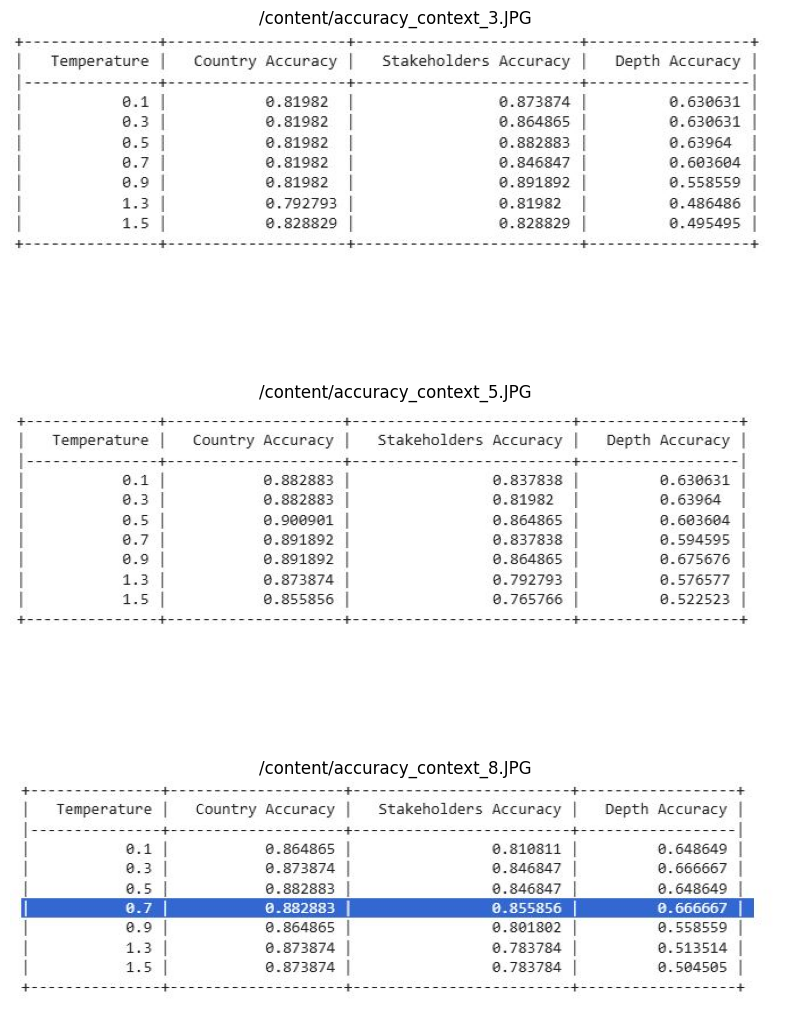

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# List of JPEG filenames to load
filenames = ['/content/accuracy_context_3.JPG', '/content/accuracy_context_5.JPG', '/content/accuracy_context_8.JPG']

# Create a figure with one column per image (vertical rows)
fig, axes = plt.subplots(nrows=len(filenames), ncols=1, figsize=(8, 12))  # Increase figsize as needed

# If there's only one image, axes won't be a list so we convert it to a list for uniformity
if len(filenames) == 1:
    axes = [axes]

for ax, file in zip(axes, filenames):
    # Open the image file
    img = Image.open(file)

    # Display the image in the subplot
    ax.imshow(img)
    # Set the subplot title to the filename
    ax.set_title(file)
    # Hide the axis ticks and labels for better visualization
    ax.axis('off')

# Adjust layout to prevent overlapping elements
plt.tight_layout()
plt.show()
